# Explore here

In [1]:
import pandas as pd

In [2]:
total_data= pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
total_data.shape

(1338, 7)

In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


La base de datos cuenta con 1338 entradas, filas, y 7 columnas, variables. 
Contamos con datos númericos(4 variables) y con datos objeto (3 variables).
No detectamos valores nulos.

DUPLICADOS

In [5]:
total_data.duplicated().sum()

np.int64(1)

Contamos con un duplicado pero al no tener id de los clientes no podemos saber si se trata o no de un valor realmente duplicado.

INFORMACIÓN IRRELEVANTE

In [6]:
total_data.drop(["region"], axis = 1, inplace = True)
total_data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


Eliminamos la variable "region" por no tener relevacia en la resolución de nuestro problema.

ANÁLISIS DE VARIABLES CATEGORICAS

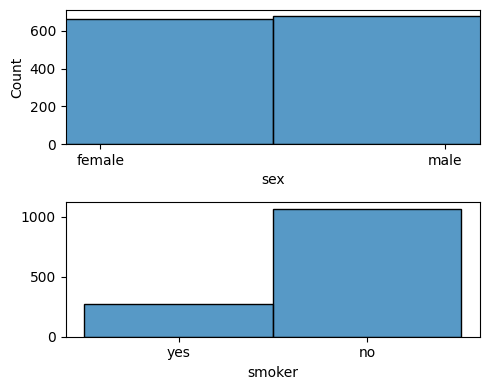

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 1, figsize = (5, 4))

# Create a multiple histogram
sns.histplot(ax = axis[0], data = total_data, x = "sex").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[1], data = total_data, x = "smoker").set(ylabel = None)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
total_data.groupby("sex")["sex"].count()

sex
female    662
male      676
Name: sex, dtype: int64

In [9]:
total_data.groupby("smoker")["smoker"].count()

smoker
no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
total_data.groupby("smoker")["smoker"].count()/len(total_data["smoker"])

smoker
no     0.795217
yes    0.204783
Name: smoker, dtype: float64

Apreciamos que el sexo de los clientes es prácticamente equitativo en su distribución y que
el 80% de los clientes no son fumadores.

ANÁLISIS DE VARIABLES NUMÉRICAS

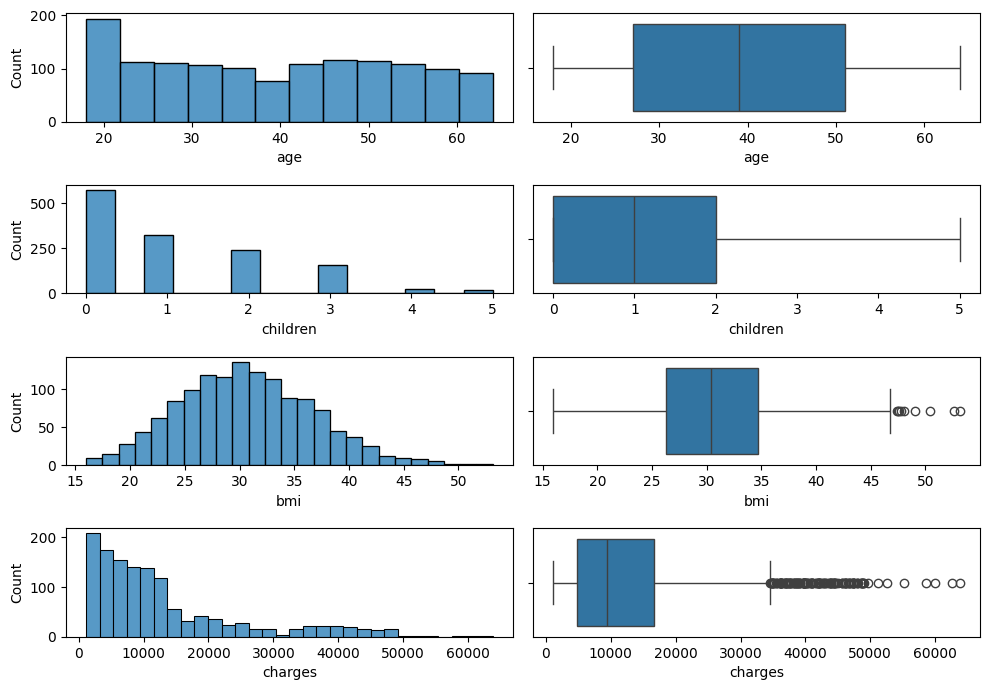

In [11]:
fig, axis = plt.subplots(4, 2, figsize = (10, 7))

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = total_data, x = "age").set(xlabel = "age")
sns.boxplot(ax = axis[0, 1], data = total_data, x = "age")
sns.histplot(ax = axis[1, 0], data = total_data, x = "children").set(xlabel = "children")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "children")
sns.histplot(ax = axis[2, 0], data = total_data, x = "bmi").set(xlabel = "bmi")
sns.boxplot(ax = axis[2, 1], data = total_data, x = "bmi")
sns.histplot(ax = axis[3, 0], data = total_data, x = "charges").set(xlabel = "charges")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "charges")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Las variables predictoras muestra outliers "bmi" y "charges".

Es significativo que la edad de los clientes no muestra outliers.



ANÁLISIS DE VARIABLES MULTIVARIANTE

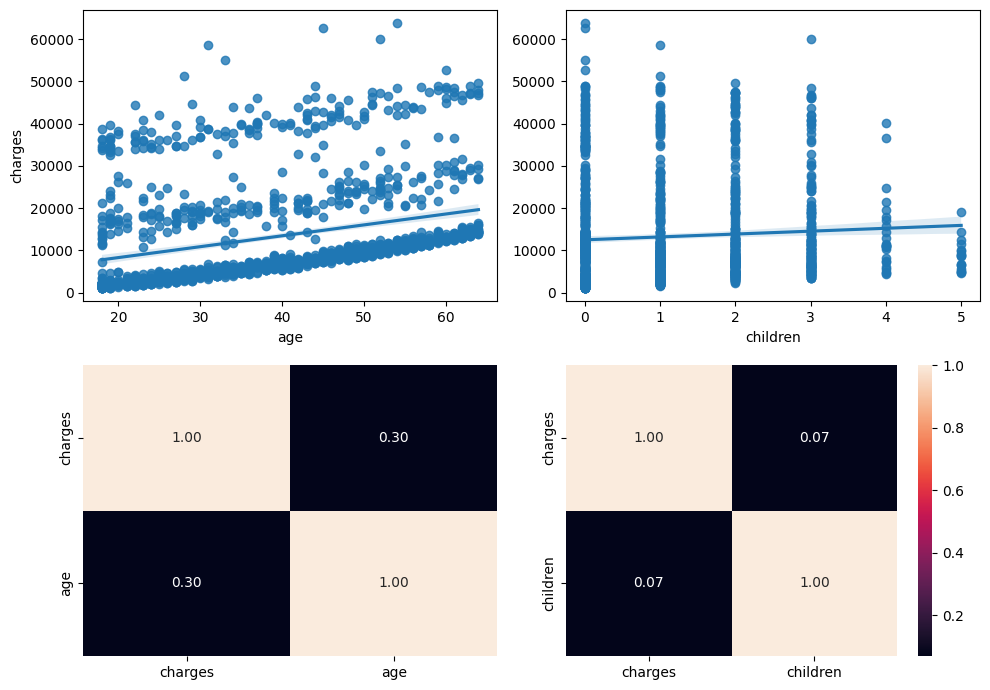

In [12]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_data, x = "age", y = "charges")
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "children", y = "charges").set(ylabel=None)
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

La correlación entre la edad del cliente y nuestra target es significativa aunque no sea determinante.
En cambio, ya podemos apreciar que la correlación de los hijos con la target no es significativa.

ANÁLISIS CATEGÓRICO-CATEGÓRICO

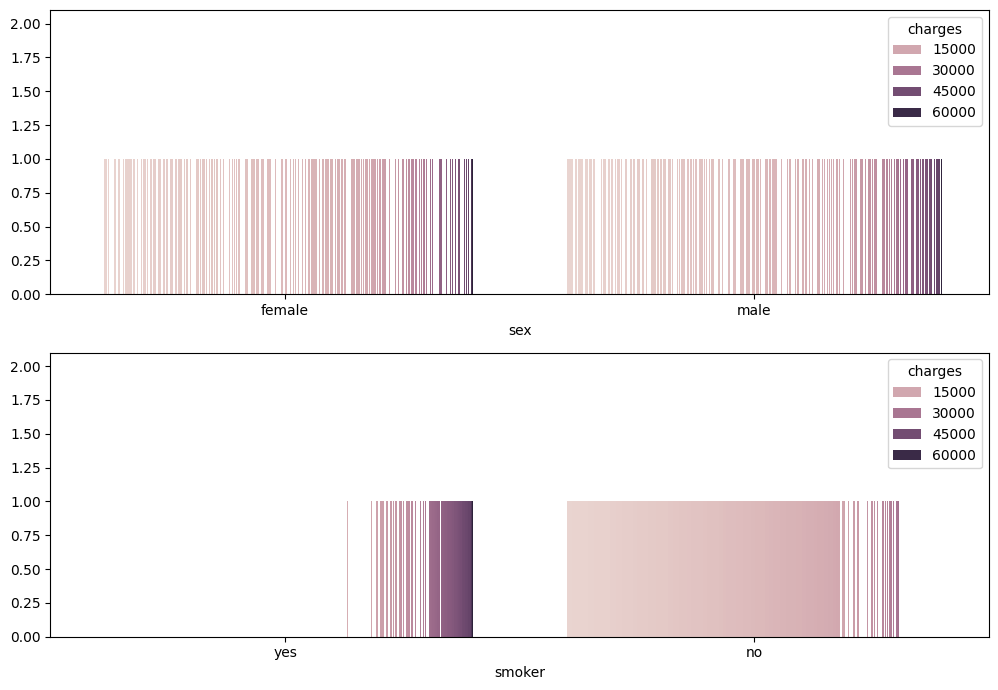

In [13]:
fig, axis = plt.subplots(2,1,figsize = (10, 7))

sns.countplot(ax = axis[0], data = total_data, x = "sex", hue="charges").set(ylabel = None)
sns.countplot(ax = axis[1], data = total_data, x = "smoker", hue="charges").set(ylabel = None)

plt.tight_layout()


plt.show()

Confirmamos que el sexo no es una variante predictora de especial relevancia, puesto que no apreciamos diferencias significativas.
Los clientes no fumadores tienen un precio del seguro más bajo que los que son fumadores.

ANÁLISIS DE CORRELACIONES

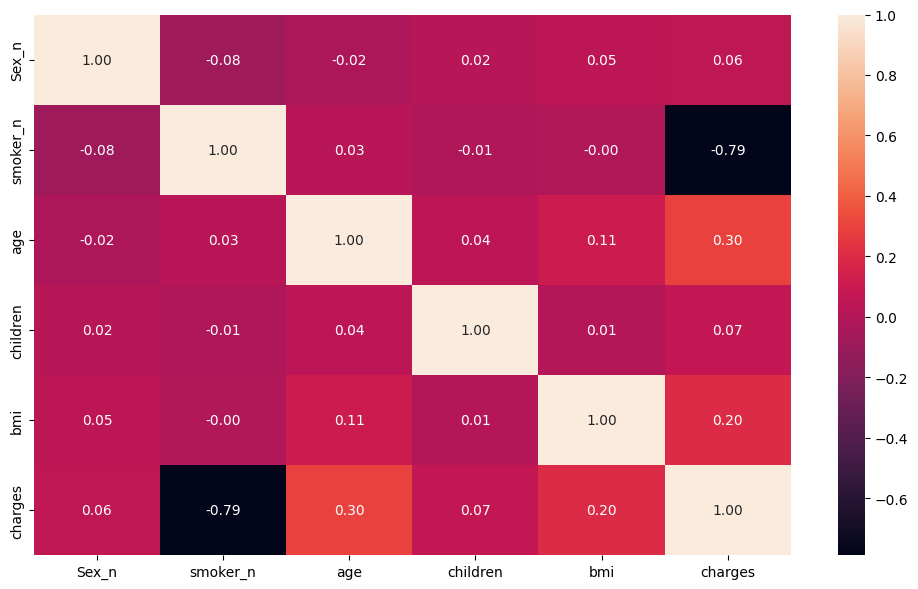

In [14]:
total_data["Sex_n"] = pd.factorize(total_data["sex"])[0]
total_data["smoker_n"] = pd.factorize(total_data["smoker"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["Sex_n", "smoker_n","age","children","bmi","charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

De las variables predictoras las que muestran correlación con nuestra target son:"smoker","age" y "bmi". Destacando la alta correlación con la primera, "smoker".

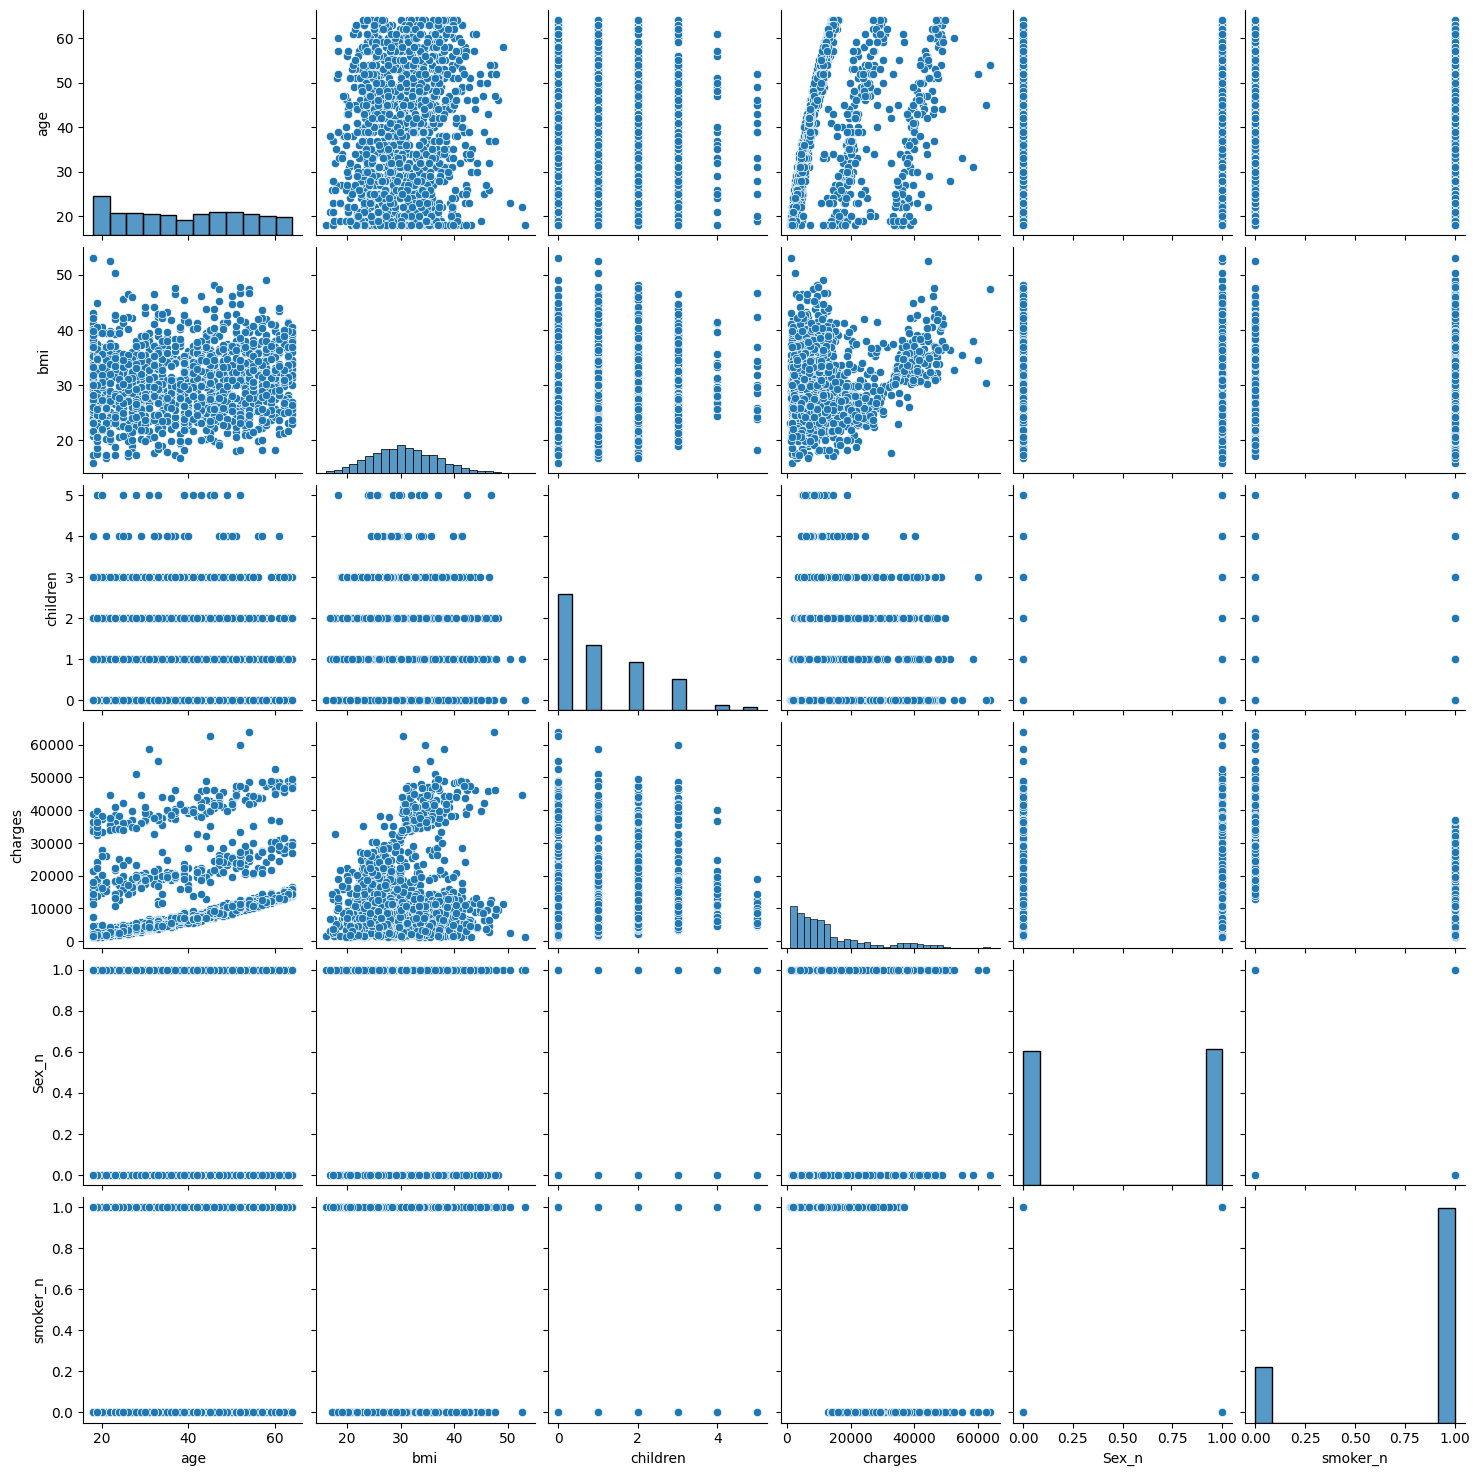

In [15]:
sns.pairplot(data = total_data)

INGENIERIA DE CARACTERÍSTICAS. FEATURE ENGINEERING

In [16]:
total_data_con=total_data.copy()
total_data_sin=total_data.copy()

DIVIDIMOS LOS DATOS EN TRAIN Y TEST

In [17]:
from sklearn.model_selection import train_test_split

num_variables = ["age", "smoker_n", "children", "Sex_n", "bmi"]

X_con = total_data_con.drop("charges", axis = 1)[num_variables]
X_sin = total_data_sin.drop("charges", axis = 1)[num_variables]
y = total_data["charges"]

X_train_con, X_test_con, y_train, y_test = train_test_split(X_con, y, test_size = 0.2, random_state = 42)
X_train_sin, X_test_sin,_, _ = train_test_split(X_sin, y, test_size = 0.2, random_state = 42)


OUTLIERS

In [18]:
bmi_stats = total_data["bmi"].describe()
bmi_stats

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [19]:
bmi_iqr = bmi_stats["75%"] - bmi_stats["25%"]
upper_limit = bmi_stats["75%"] + (1.5 * bmi_iqr)
lower_limit = bmi_stats["25%"] - (1.5 * bmi_iqr)

if lower_limit < 0:lower_limit = 0.00
total_data_sin = total_data_sin.bmi.apply(lambda x:upper_limit if(x>upper_limit)else x)

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(bmi_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 47.29 y 13.7, con un rango intercuartílico de 8.4


In [20]:
total_data[total_data["bmi"] > upper_limit]

,age,sex,bmi,children,smoker,charges,Sex_n,smoker_n
116,58,male,49.06,0,no,11381.32540,1,1
286,46,female,48.07,2,no,9432.92530,0,1
401,47,male,47.52,1,no,8083.91980,1,1
543,54,female,47.41,0,yes,63770.42801,0,0
847,23,male,50.38,1,no,2438.05520,1,1
860,37,female,47.60,2,yes,46113.51100,0,0
1047,22,male,52.58,1,yes,44501.39820,1,0
1088,52,male,47.74,1,no,9748.91060,1,1
1317,18,male,53.13,0,no,1163.46270,1,1


In [21]:
bmi_stats

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

Después de analizar los outliers de "bmi" concluyo no eliminarlos por ser un dato importante para nuestro modelo, lo que demuestra su correlación alta con nuestra target.

VALORES NULOS

In [22]:
total_data.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
Sex_n       0
smoker_n    0
dtype: int64

No encontramos valores nulos.

ESCALADO DE VALORES

NORMALIZACIÓN 

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_con)

X_train_norm_con = scaler.transform(X_train_con)
X_train_norm_con = pd.DataFrame(X_train_norm_con, index = X_train_con.index, columns = num_variables)

X_test_norm_con = scaler.transform(X_test_con)
X_test_norm_con = pd.DataFrame(X_test_norm_con, index = X_test_con.index, columns = num_variables)


X_train_norm_con.head()

,age,smoker_n,children,Sex_n,bmi
560,0.472227,0.508747,0.734336,-1.024602,-1.756525
1285,0.543313,0.508747,-0.911192,-1.024602,-1.033082
1142,0.898745,0.508747,-0.911192,-1.024602,-0.943687
969,-0.025379,0.508747,3.202629,-1.024602,0.622393
486,1.040918,0.508747,1.557100,-1.024602,-1.504893


In [24]:
X_test_norm_con.head()

,age,smoker_n,children,Sex_n,bmi
764,0.401140,0.508747,0.734336,-1.024602,-0.891539
887,-0.238638,0.508747,-0.911192,-1.024602,-0.089461
890,1.751782,-1.965613,-0.911192,-1.024602,-0.608453
1293,0.472227,0.508747,1.557100,0.975989,-0.797177
259,-1.447107,-1.965613,-0.911192,0.975989,0.225079


In [25]:
scaler.fit(X_train_sin)

X_train_norm_sin = scaler.transform(X_train_sin)
X_train_norm_sin = pd.DataFrame(X_train_norm_sin, index = X_train_sin.index, columns = num_variables)

X_test_norm_sin = scaler.transform(X_test_sin)
X_test_norm_sin = pd.DataFrame(X_test_norm_sin, index = X_test_sin.index, columns = num_variables)


X_train_norm_sin.head()

,age,smoker_n,children,Sex_n,bmi
560,0.472227,0.508747,0.734336,-1.024602,-1.756525
1285,0.543313,0.508747,-0.911192,-1.024602,-1.033082
1142,0.898745,0.508747,-0.911192,-1.024602,-0.943687
969,-0.025379,0.508747,3.202629,-1.024602,0.622393
486,1.040918,0.508747,1.557100,-1.024602,-1.504893


In [26]:
X_test_norm_sin

,age,smoker_n,children,Sex_n,bmi
764,0.401140,0.508747,0.734336,-1.024602,-0.891539
887,-0.238638,0.508747,-0.911192,-1.024602,-0.089461
890,1.751782,-1.965613,-0.911192,-1.024602,-0.608453
1293,0.472227,0.508747,1.557100,0.975989,-0.797177
259,-1.447107,-1.965613,-0.911192,0.975989,0.225079
...,...,...,...,...,...
109,1.680696,-1.965613,-0.911192,0.975989,0.749865
575,1.325264,0.508747,-0.911192,-1.024602,-0.561272
535,-0.096465,0.508747,-0.088428,0.975989,-0.419729
543,1.040918,-1.965613,-0.911192,-1.024602,2.789410


ESCALADO MÍNIMO - MÁXIMO

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_con)

X_train_scal_con = scaler.transform(X_train_con)
X_train_scal_con = pd.DataFrame(X_train_scal_con, index = X_train_con.index, columns = num_variables)

X_test_scal_con = scaler.transform(X_test_con)
X_test_scal_con = pd.DataFrame(X_test_scal_con, index = X_test_con.index, columns = num_variables)

X_train_scal_con.head()

,age,smoker_n,children,Sex_n,bmi
560,0.608696,1.0,0.4,0.0,0.107345
1285,0.630435,1.0,0.0,0.0,0.224913
1142,0.739130,1.0,0.0,0.0,0.239440
969,0.456522,1.0,1.0,0.0,0.493947
486,0.782609,1.0,0.6,0.0,0.148238


In [28]:
scaler.fit(X_train_sin)

X_train_scal_sin = scaler.transform(X_train_sin)
X_train_scal_sin = pd.DataFrame(X_train_scal_sin, index = X_train_sin.index, columns = num_variables)

X_test_scal_sin = scaler.transform(X_test_sin)
X_test_scal_sin = pd.DataFrame(X_test_scal_sin, index = X_test_sin.index, columns = num_variables)

X_train_scal_sin.head()

,age,smoker_n,children,Sex_n,bmi
560,0.608696,1.0,0.4,0.0,0.107345
1285,0.630435,1.0,0.0,0.0,0.224913
1142,0.739130,1.0,0.0,0.0,0.239440
969,0.456522,1.0,1.0,0.0,0.493947
486,0.782609,1.0,0.6,0.0,0.148238


SELECCIÓN DE CARACTERÍSTICAS

In [29]:
from sklearn.feature_selection import f_classif, SelectKBest


selection_model = SelectKBest(f_classif, k = 4)
selection_model.fit(X_train_con, y_train)
ix = selection_model.get_support()
X_train_sel_con = pd.DataFrame(selection_model.transform(X_train_con), columns = X_train_con.columns.values[ix])
X_test_sel_con = pd.DataFrame(selection_model.transform(X_test_con), columns = X_test_con.columns.values[ix])


X_train_sel_con.head()

/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,smoker_n,children,Sex_n,bmi
0,1.0,2.0,0.0,19.95
1,1.0,0.0,0.0,24.32
2,1.0,0.0,0.0,24.86
3,1.0,5.0,0.0,34.32
4,1.0,3.0,0.0,21.47


In [30]:
X_test_sel_con.head()

,smoker_n,children,Sex_n,bmi
0,1.0,2.0,0.0,25.175
1,1.0,0.0,0.0,30.020
2,0.0,0.0,0.0,26.885
3,1.0,3.0,1.0,25.745
4,0.0,0.0,1.0,31.920


In [31]:
X_train_sel_con["charges"] = list(y_train)
X_test_sel_con["charges"] = list(y_test)

In [32]:
X_train_sel_con.head()

,smoker_n,children,Sex_n,bmi,charges
0,1.0,2.0,0.0,19.95,9193.83850
1,1.0,0.0,0.0,24.32,8534.67180
2,1.0,0.0,0.0,24.86,27117.99378
3,1.0,5.0,0.0,34.32,8596.82780
4,1.0,3.0,0.0,21.47,12475.35130


In [33]:
X_test_sel_con.head()


,smoker_n,children,Sex_n,bmi,charges
0,1.0,2.0,0.0,25.175,9095.06825
1,1.0,0.0,0.0,30.020,5272.17580
2,0.0,0.0,0.0,26.885,29330.98315
3,1.0,3.0,1.0,25.745,9301.89355
4,0.0,0.0,1.0,31.920,33750.29180


In [34]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model.fit(X_train_sin, y_train)
ix = selection_model.get_support()
X_train_sel_sin = pd.DataFrame(selection_model.transform(X_train_sin), columns = X_train_sin.columns.values[ix])
X_test_sel_sin = pd.DataFrame(selection_model.transform(X_test_sin), columns = X_test_con.columns.values[ix])


X_train_sel_sin.head()

/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,smoker_n,children,Sex_n,bmi
0,1.0,2.0,0.0,19.95
1,1.0,0.0,0.0,24.32
2,1.0,0.0,0.0,24.86
3,1.0,5.0,0.0,34.32
4,1.0,3.0,0.0,21.47


In [35]:
X_train_sel_sin["charges"] = list(y_train)
X_test_sel_sin["charges"] = list(y_test)

In [36]:
X_test_sel_sin.head()

,smoker_n,children,Sex_n,bmi,charges
0,1.0,2.0,0.0,25.175,9095.06825
1,1.0,0.0,0.0,30.020,5272.17580
2,0.0,0.0,0.0,26.885,29330.98315
3,1.0,3.0,1.0,25.745,9301.89355
4,0.0,0.0,1.0,31.920,33750.29180


In [37]:
X_train_norm_sel_con=X_train_norm_con.drop("age",axis=1)
X_test_norm_sel_con=X_test_norm_con.drop("age",axis=1)
X_train_norm_sel_sin=X_train_norm_sin.drop("age",axis=1)
X_test_norm_sel_sin=X_test_norm_sin.drop("age",axis=1)
X_train_scal_sel_con=X_train_scal_con.drop("age",axis=1)
X_test_scal_sel_con=X_test_scal_con.drop("age",axis=1)
X_train_scal_sel_sin=X_train_scal_sin.drop("age",axis=1)
X_test_scal_sel_sin=X_test_scal_sin.drop("age",axis=1)



In [38]:
total_data_con.to_csv("/workspaces/Regresi-n-Lineal/data/processed/total_data_con.csv", index=False)
total_data_sin.to_csv("/workspaces/Regresi-n-Lineal/data/processed/total_data_sin.csv", index=False)

#Originales

X_train_sel_con.to_csv("/workspaces/Regresi-n-Lineal/data/processed/X_train_sel_con.csv", index=False)
X_test_sel_con.to_csv("/workspaces/Regresi-n-Lineal/data/processed/X_test_sel_con.csv", index=False)
X_train_sel_sin.to_csv("/workspaces/Regresi-n-Lineal/data/processed/X_train_sel_sin.csv", index=False)
X_test_sel_sin.to_csv("/workspaces/Regresi-n-Lineal/data/processed/X_test_sel_sin.csv", index=False)

# Normalizados

X_train_norm_sel_con.to_csv("/workspaces/Regresi-n-Lineal/data/processed/X_train_norm_sel_con.csv", index=False)
X_test_norm_sel_con.to_csv("/workspaces/Regresi-n-Lineal/data/processed/X_test_norm_sel_con.csv", index=False)
X_train_norm_sel_sin.to_csv("/workspaces/Regresi-n-Lineal/data/processed/X_train_norm_sel_sin.csv", index=False)
X_test_norm_sel_sin.to_csv("/workspaces/Regresi-n-Lineal/data/processed/X_test_norm_sel_sin.csv", index=False)
X_train_scal_sel_con.to_csv("/workspaces/Regresi-n-Lineal/data/processed/X_train_scal_sel_con.csv", index=False)
X_test_scal_sel_con.to_csv("/workspaces/Regresi-n-Lineal/data/processed/X_test_scal_sel_con.csv", index=False)
X_train_scal_sel_sin.to_csv("/workspaces/Regresi-n-Lineal/data/processed/X_train_scal_sel_sin.csv", index=False)
X_test_scal_sel_sin.to_csv("/workspaces/Regresi-n-Lineal/data/processed/X_test_scal_sel_sin.csv", index=False)

# Y

y_train.to_csv("/workspaces/Regresi-n-Lineal/data/processed/y_train.csv", index=False)
y_test.to_csv("/workspaces/Regresi-n-Lineal/data/processed/y_test.csv", index=False)